# Примеры квантовых схем

In [20]:
import sys

sys.path.append('..')

### 1. Оператор X (классический аналог NOT)

$$
    X = \begin{pmatrix}
        0 & 1 \\
        1 & 0 \\
    \end{pmatrix}
$$

действует на 1 кубит

<center>
    <img src="../images/gate-X.png" width="260">
</center>

который был в состоянии |0> до применении оператора X

##### a) Создание схемы

In [21]:
import qiskit
import qiskit_aer

qc = qiskit.QuantumCircuit(1, 1)

qc.x(0)

qc.measure(0, 0)

qc.draw()

┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

##### b) Симуляция

In [22]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(qc).result()

counts = result.get_counts(qc)

counts

{'1': 1024}

##### c) Гистограмма

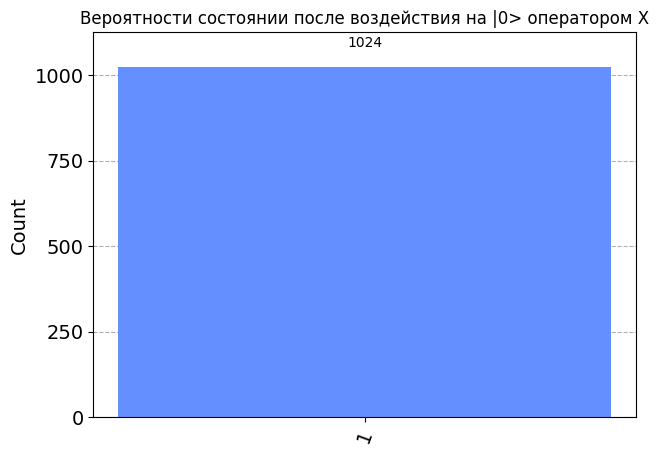

In [23]:
qiskit.visualization.plot_histogram(counts, title='Вероятности состоянии после воздействия на |0> оператором X')

### 2. Оператор CX (Conditional NOT)

$$
    CX = \begin{pmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0 \\
    \end{pmatrix}
$$

действует на 2 кубита

<center>
    <img src="../images/gate-CX.png" width="260">
</center>

которые были в состоянии |0> до применения оператора CX

In [24]:
qc = qiskit.QuantumCircuit(2)

qc.cx(0, 1)

qc.measure_all()

qc.draw()

░ ┌─┐   
   q_0: ──■───░─┤M├───
        ┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1

In [25]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(qc).result()

counts = result.get_counts(qc)

counts

{'00': 1024}

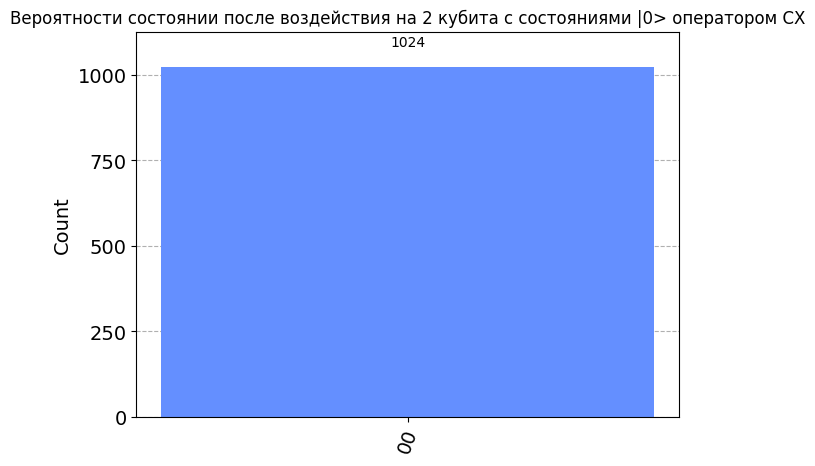

In [26]:
qiskit.visualization.plot_histogram(counts, title='Вероятности состоянии после воздействия на 2 кубита с состояниями |0> оператором CX')

Давайте теперь перед воздействием оператором СX, воздействуем на 1-ый кубит оператором X, тем самым поменяем состояние 1-го кубита с |0> на |1>.

Тогда оператор CX будет действовать на 2 кубита с состояниями |10>

In [27]:
qc = qiskit.QuantumCircuit(2)

qc.x(0)
qc.cx(0, 1)

qc.measure_all()

qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ X ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [28]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(qc).result()

counts = result.get_counts(qc)

counts

{'11': 1024}

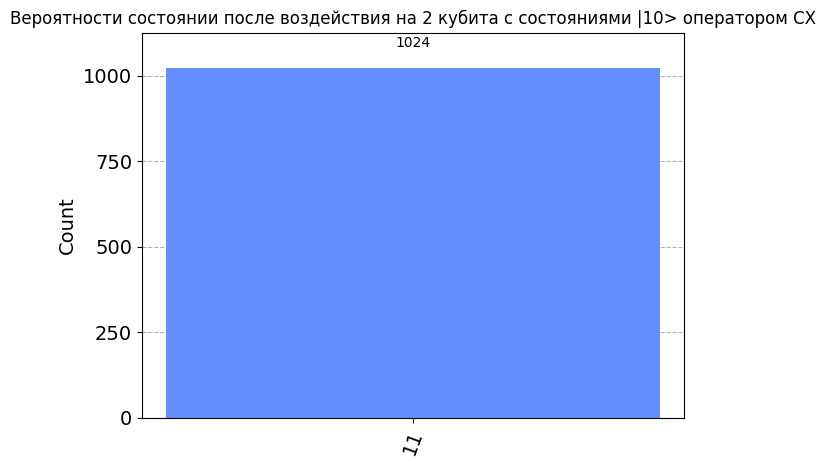

In [29]:
qiskit.visualization.plot_histogram(counts, title='Вероятности состоянии после воздействия на 2 кубита с состояниями |10> оператором CX')

 ### 3. Оператор Белла

 $$
    |\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
 $$

 действует на 2 кубита 

 <center>
    <img src="../images/gate-Bell.png" width="260">
</center>

 которые были в состоянии |0> до применения оператора $|\Phi^+\rangle$

In [30]:
qc = qiskit.QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.measure_all()

qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [31]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(qc).result()

counts = result.get_counts(qc)

counts

{'00': 517, '11': 507}

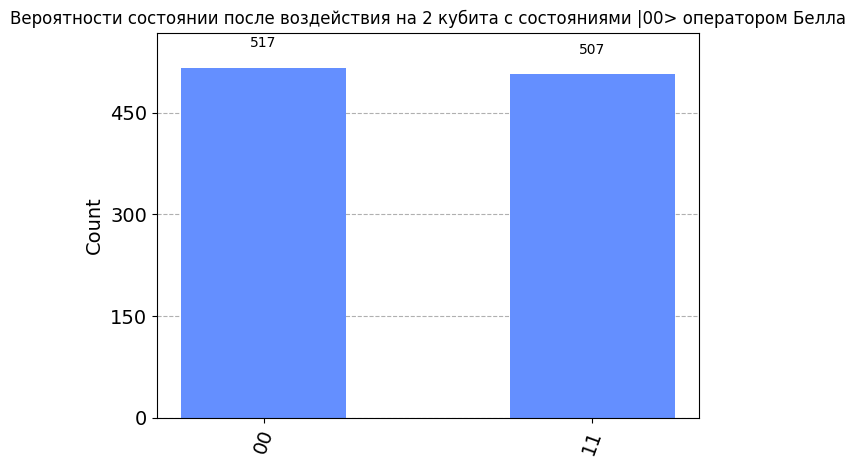

In [32]:
qiskit.visualization.plot_histogram(counts, title='Вероятности состоянии после воздействия на 2 кубита с состояниями |00> оператором Белла')

### 4. Шумовые модели

In [33]:
from modules.noise.models import get_noise

noise_model = get_noise(0.1, 0.1)

qc = qiskit.QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.measure_all()

qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [34]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(qc, noise_model = noise_model).result()

counts = result.get_counts(qc)

counts

{'10': 110, '11': 387, '00': 396, '01': 131}

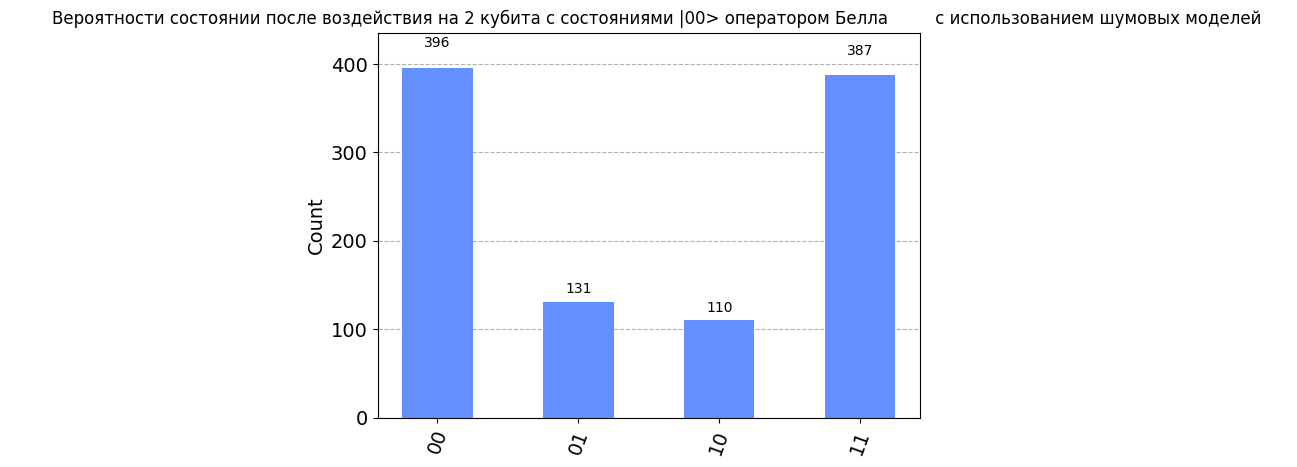

In [38]:
qiskit.visualization.plot_histogram(
    counts, 
    title='\
        Вероятности состоянии после воздействия на 2 кубита с состояниями |00> оператором Белла \
        с использованием шумовых моделей \
    '
)